Support Vector Machines


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.svm import SVC

In [7]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [8]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
model = SVC()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [12]:
model.fit(X_train, Y_train)

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
from sklearn import metrics

In [14]:
predicted = model.predict(X_test)

In [15]:
expected = Y_test

In [16]:
# print accuracy
print (metrics.accuracy_score(expected, predicted))

0.9736842105263158


Exploring different Kernels

In [17]:
from sklearn import svm

In [19]:
X = iris.data[:,:2]
Y = iris.target
C = 1.0

In [20]:
#SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

In [21]:
# Gaussian Radial Bassis FUnction
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [22]:
# SVC 3rd degree polynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,Y)

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
#step size
h = 0.02

#x axis
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

#y axis
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [28]:
# mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max, h))

In [29]:
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial degree 3 kernel']

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()
C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: linewidths is ignored by contourf
  # This is added back by InteractiveShellApp.init_path()


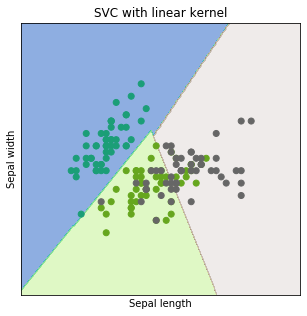

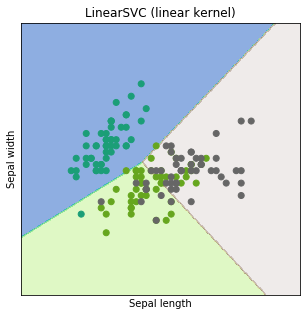

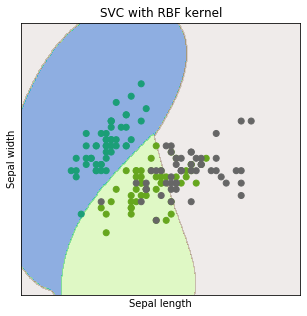

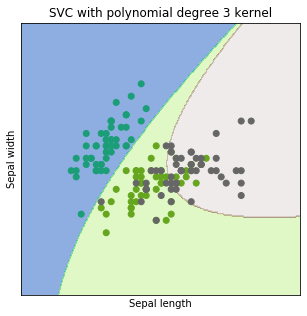

In [32]:
for i, clf in enumerate((svc,lin_svc, rbf_svc, poly_svc)):
    
    plt.figure(figsize = (12,12))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain, alpha=0.5, linewidths=0)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])